# Analyzing Personality (Brasil Escola) 🌊

Analysis of the texts generated by the **Persona-Predict** 🧠 service. Analyses were conducted using **200** randomly selected records from the Brasil Escola 🇧🇷 dataset, which comprises essays from Brazilian students:

  - https://github.com/gpassero/uol-redacoes-xml/tree/master/brasilescola

If the graphics are not rendered, use the address:
  - 

For more information about the service visit: [docs.neuroquest.ai/persona-predict](https://docs.neuroquest.ai/persona-predict/)



In [8]:
import os

import pandas as pd
from IPython.display import JSON, HTML, display

# import utility as U

##
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

In [9]:
df = pd.read_csv("persona-predict-br-escola.csv.gz", compression="gzip")

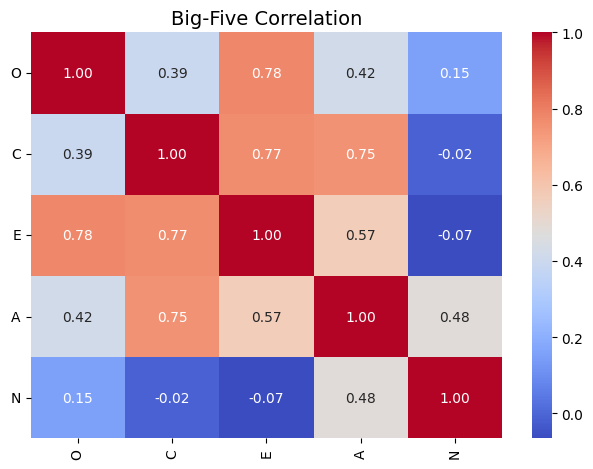

In [10]:
big5_acronym = ["O", "C", "E", "A", "N"]

correlation_matrix = df[["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"]].corr()
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

ax.set_xticklabels(big5_acronym)
ax.set_yticklabels(big5_acronym)

plt.title("Big-Five Correlation", fontsize=14)
plt.tight_layout()
plt.show()

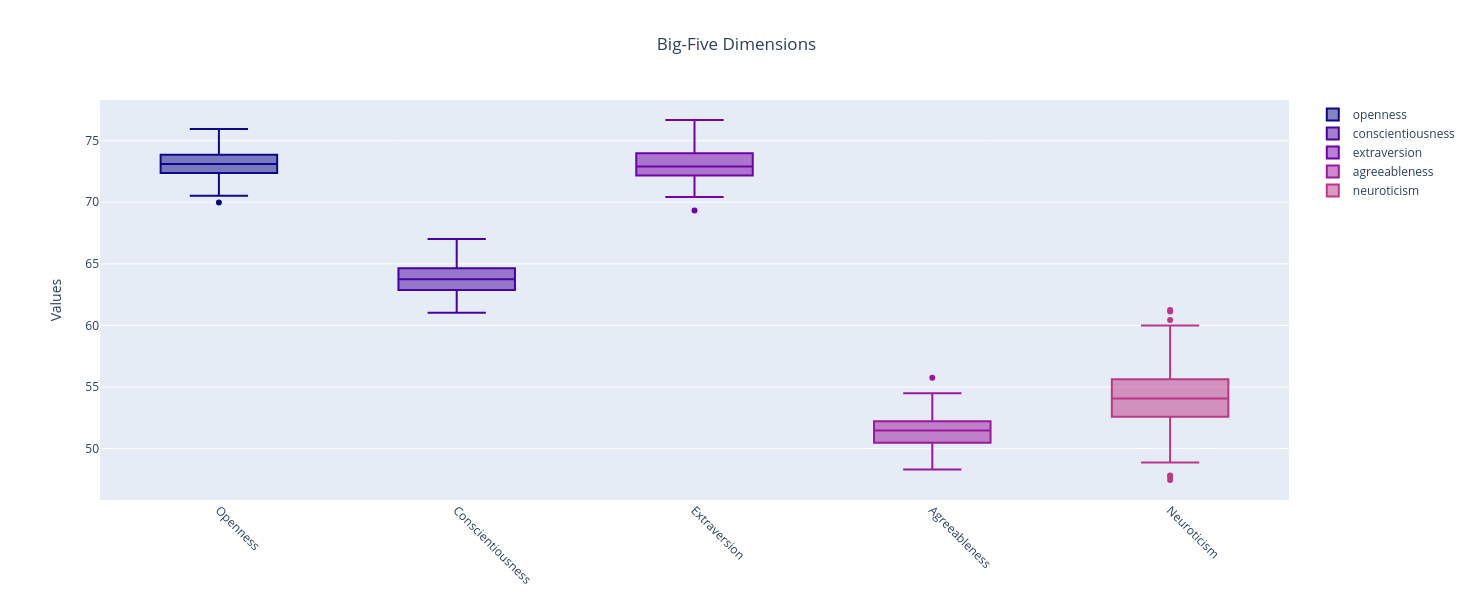

In [11]:
colors = px.colors.sequential.Plasma
# colors = px.colors.sequential.Cividis
# px.colors.sequential.Plasma
# px.colors.sequential.Inferno
# px.colors.sequential.Magma
# px.colors.sequential.Cividis
# px.colors.sequential.Turbo
# colors = px.colors.sequential.Oranges

big5_dimensions = [
    "openness",
    "conscientiousness",
    "extraversion",
    "agreeableness",
    "neuroticism",
]
data = [df[x].tolist() for x in big5_dimensions]

fig = go.Figure()

for i, dim in enumerate(big5_dimensions):
    fig.add_trace(go.Box(y=data[i], name=dim, marker_color=colors[i]))

fig.update_layout(
    title=dict(text="Big-Five Dimensions", x=0.5),
    yaxis=dict(title="Values"),
    xaxis=dict(
        tickvals=list(range(len(big5_dimensions))),
        ticktext=[
            "Openness",
            "Conscientiousness",
            "Extraversion",
            "Agreeableness",
            "Neuroticism",
        ],
        tickangle=45,
    ),
    height=600,
    width=1000,
    margin=dict(l=100, r=100, b=100, t=100),
)

fig.show()


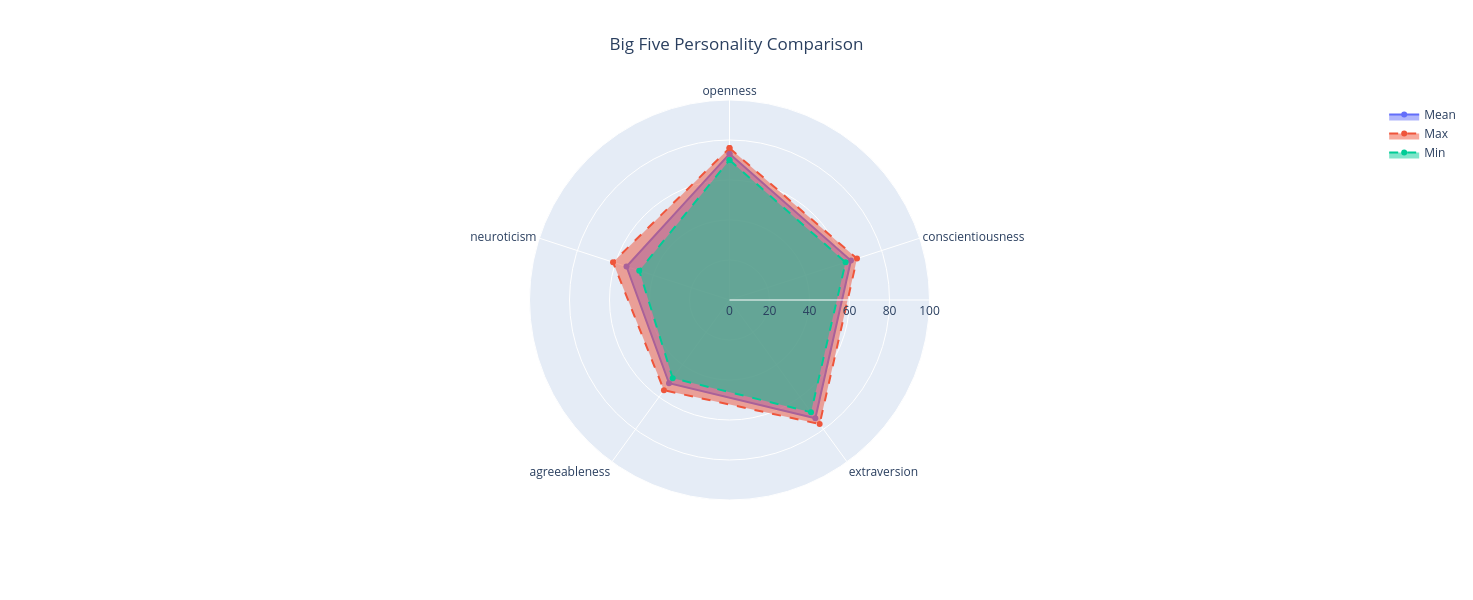

In [12]:
mean_values = df[big5_dimensions].mean()
min_values = df[big5_dimensions].min()
max_values = df[big5_dimensions].max()

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=mean_values.tolist() + mean_values.tolist()[:1],
        theta=big5_dimensions + big5_dimensions[:1],
        fill="toself",
        name="Mean",
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=max_values.tolist() + max_values.tolist()[:1],
        theta=big5_dimensions + big5_dimensions[:1],
        fill="toself",
        name="Max",
        line=dict(dash="dash"),
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=min_values.tolist() + min_values.tolist()[:1],
        theta=big5_dimensions + big5_dimensions[:1],
        fill="toself",
        name="Min",
        line=dict(dash="dash"),
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100]),
        angularaxis=dict(rotation=90, direction="clockwise"),
    ),
    showlegend=True,
    title=dict(text="Big Five Personality Comparison", x=0.5),
    height=600,
    width=1000,
    margin=dict(l=100, r=100, b=100, t=100),
)

fig.show()


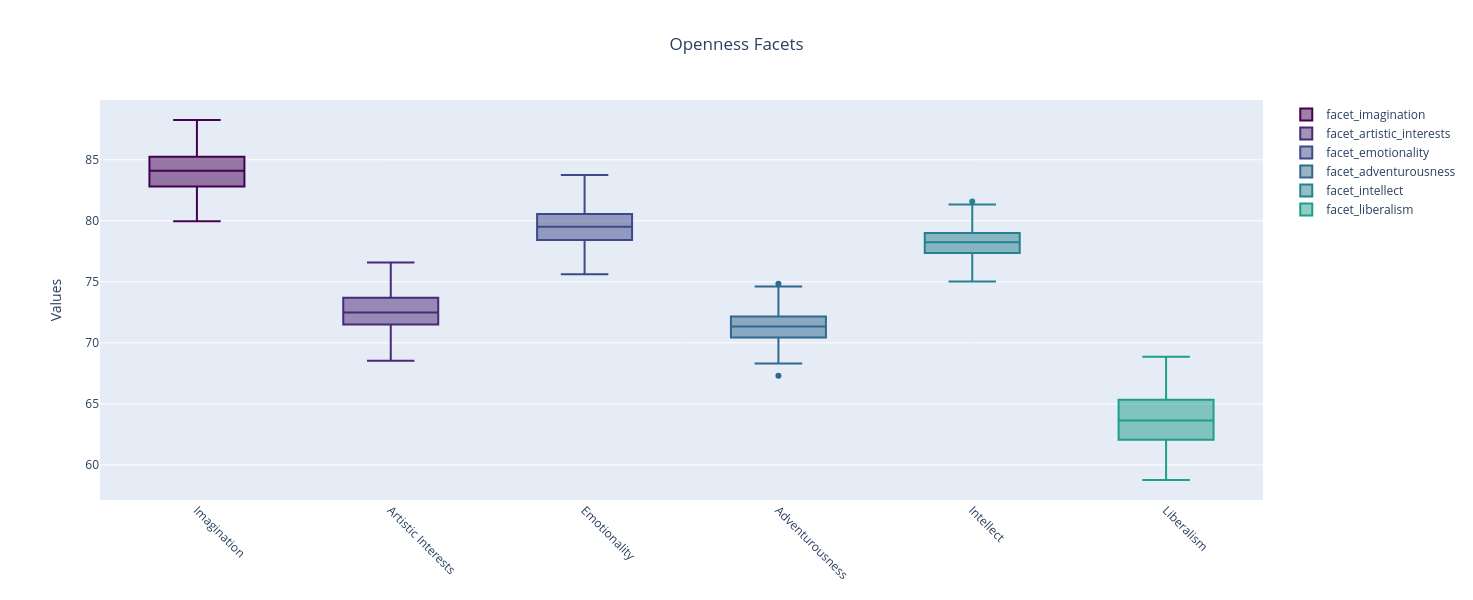

In [13]:
colors = px.colors.sequential.Viridis

openness_dimensions = [
    "facet_imagination",
    "facet_artistic_interests",
    "facet_emotionality",
    "facet_adventurousness",
    "facet_intellect",
    "facet_liberalism",
]

data = [df[x].tolist() for x in openness_dimensions]

fig = go.Figure()

for i, dim in enumerate(openness_dimensions):
    fig.add_trace(go.Box(y=data[i], name=dim, marker_color=colors[i]))

fig.update_layout(
    title=dict(text="Openness Facets", x=0.5),
    yaxis=dict(title="Values"),
    xaxis=dict(
        tickvals=list(range(len(openness_dimensions))),
        ticktext=[
            "Imagination",
            "Artistic Interests",
            "Emotionality",
            "Adventurousness",
            "Intellect",
            "Liberalism",
        ],
        tickangle=45,
    ),
    height=600,
    width=1000,
    margin=dict(l=100, r=100, b=100, t=100),
)

fig.show()
